# Mass Mobilization Project
<img style="float: right;" src="../images/man_with_hammer.png">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score)

In [3]:
# mass_no_country = pd.read_pickle('../data/mass_no_country.pickle')

In [4]:
mass_no_country = pd.read_csv('../data/03_mass_no_country.csv')

In [5]:
mass_no_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     15179 non-null  int64  
 1   country                                15179 non-null  object 
 2   ccode                                  15179 non-null  int64  
 3   region                                 15179 non-null  object 
 4   protestnumber                          15179 non-null  int64  
 5   protesterviolence                      15179 non-null  float64
 6   location                               15158 non-null  object 
 7   protesteridentity                      15179 non-null  object 
 8   sources                                15175 non-null  object 
 9   notes                                  15179 non-null  object 
 10  protester_id_type                      15179 non-null  object 
 11  pa

In [8]:
# mass_no_country = pd.read_pickle('../data/mass_no_country.pickle')

In [11]:
# mass_no_country.info()

In [54]:
# plt.scatter(mass_no_country['protestnumber'], mass_no_country['violent_response'])

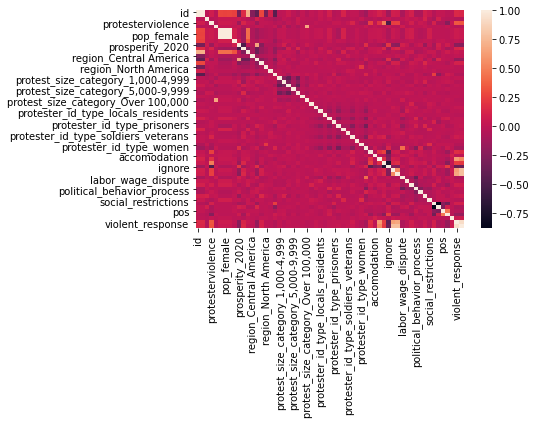

In [58]:
sns.heatmap(mass_no_country.corr());

In [71]:
mass_no_country.shape

(15179, 71)

#### Using a GridSearch to find the best hyperparameters _**for each distinct target**_ that will be passed into my series of Logistic Regressions in the [06_log_reg_for_model_performance_and_coefficient_plots](projects/Mass-Protests/archive/06_log_reg_for_model_performance_&_coefficient_plots.ipynb) notebook**_

_GridSearch code provided by Hayden._

In [6]:

results = {
    'target':[],
    'best_cv_scores' : [],
    'best_params' : [],
    'train_f1_scores' : [],
    'test_f1_scores' : [],
    'train_precision_scores' : [], 
    'test_precision_scores' : [],
    'train_recall_scores' : [],
    'test_recall_scores' : []
}

targets = ['arrests','accomodation','crowddispersal','ignore', 'violent_response']   
# grids =[]


for target in targets:    
    
    features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'protest_duration', 'pop_male', 'pop_female', 'pop_total',
           'crowddispersal', 'ignore', 'killings', 'shootings', 'violent_response', 'violent_count'])
    
    X = features
    y = mass_no_country[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)
    
    ss = StandardScaler()
    
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    logreg = LogisticRegression()
    
    params = {
        'penalty' : ['l1','l2'], 
        'C' : [.01, 1, 10],
        'solver' : ['liblinear', 'saga', 'lfgbs'],
        'max_iter' : [100, 1000]
    }
    
    gs = GridSearchCV(logreg, param_grid=params, cv=10, verbose=2)
    
#     grids.append(gs)
    
#     for grid in grids: 
        
    # fit grids
    gs.fit(X_train_sc, y_train)
    
    # appending name of target to identify results 
    results['target'].append(target)

    # append important grid results
    results['best_params'].append(gs.best_params_)
    results['best_cv_scores'].append(gs.best_score_)

    # make predictions 
    train_preds = gs.predict(X_train_sc)
    test_preds = gs.predict(X_test_sc)

    # various classification metrics
    # f1 scores
    results['train_f1_scores'].append(f1_score(y_train, train_preds))
    results['test_f1_scores'].append(f1_score(y_test, test_preds))

    # precision scores 
    results['train_precision_scores'].append(precision_score(y_train, train_preds))
    results['test_precision_scores'].append(precision_score(y_test, test_preds))

    # recall scores
    results['train_recall_scores'].append(recall_score(y_train, train_preds))
    results['test_recall_scores'].append(recall_score(y_test, test_preds))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.2s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.2s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.7s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.7s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   2.5s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   1.5s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   2.8s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.6s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.5s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.9s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.6s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   6.6s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.7s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   5.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.1s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   4.9s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   4.6s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   2.3s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   3.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   3.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.7s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ..C=10, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   9.7s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   8.2s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   9.4s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   6.9s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   7.3s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   8.6s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=  10.9s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   7.8s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   9.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   9.5s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   9.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   6.9s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   4.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   6.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=  11.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   9.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=  11.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   9.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   8.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=  11.8s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, so

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.9s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   2.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   3.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   2.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   4.7s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   3.2s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   4.4s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   4.4s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   1.3s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.6s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   4.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.8s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.4s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   3.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=0.01, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.9s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.1s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   6.1s
[CV] END ........C=1, max_iter=1000, penalty=l1, solver=saga; total time=   4.3s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.8s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   3.5s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.3s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.4s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.3s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.2s
[CV] END ........C=10, max_i

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.1s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.3s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.4s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.3s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.3s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lfgbs; total time=   0.0s
Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l1, so

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.3s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.1s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .C=0.01, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END .....C=0.01, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.7s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   1.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.9s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.4s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   2.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.9s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ...C=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ...C=1, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   2.2s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s
[CV] END ........C=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END ........C=1, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   3.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   3.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.9s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.7s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.3s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   2.8s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.2s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.3s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   2.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.9s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   1.1s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lfgbs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ...C=10, max_iter=1

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.2s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.2s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.5s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.1s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   1.0s


/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line

[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.9s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lfgbs; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=liblinear; total time=   2.6s
[CV] END ..C=10, max_iter=10

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   2.0s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   1.4s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END .......C=10, max_it

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lfgbs.

  warnings.warn("

In [34]:
mass_no_country.shape

(15179, 73)

In [19]:
pd.options.display.max_colwidth = 150

_The hyperparameters in the `results_df` are what will be fed into my Logistic Regression function in the [06_log_reg_for_model_performance_and_coefficient_plots](projects/Mass-Protests/code/06_log_reg_for_model_performance_and_coefficient_plots.ipynb) notebook in this subrepo._

In [20]:
results_df = pd.DataFrame(results)
results_df

,target,best_cv_scores,best_params,train_f1_scores,test_f1_scores,train_precision_scores,test_precision_scores,train_recall_scores,test_recall_scores
0,arrests,0.858108,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,accomodation,0.899037,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}",0.003252,0.000000,0.500000,0.000000,0.001631,0.000000
2,crowddispersal,0.789179,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}",0.636713,0.626690,0.696206,0.701316,0.586586,0.566419
3,ignore,0.734828,"{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}",0.785948,0.790331,0.700785,0.700839,0.894673,0.906024
4,violent_response,0.876060,"{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}",0.167691,0.225352,0.595238,0.676056,0.097593,0.135211


In [191]:
# mass.to_csv('../data/03_mass_violent_response.csv', index=False)

In [193]:
# mass.to_pickle('../data/03_mass_violent_response.pickle')